# 주성분 분석(PCA: Principal Component Analysis)
- 다차원의 데이터를 소차원의 데이터로 환원시키는 기법


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Numpy Data 불러오기
import numpy as np
fruits = np.load("../Data/fruits.npy")
fruits.shape

(300, 100, 100)

In [3]:
# 2차원 배열로 변경하기
fruits_2d = fruits.reshape(-1,100*100)
fruits_2d.shape

(300, 10000)

# PCA 모델 구성하기

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 300개의 데이터중 구별이 확실한 주성분 50개 선택 (Feature들 중 특징을 포함하여 구성)
pca.fit(fruits_2d)


PCA(n_components=50)

In [5]:
# 축소된 차원 크기 확인하기
pca.components_.shape

(50, 10000)

In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr,ratio=1):
     n = len(arr) # n은 샘플 갯수
     # 한 줄에 10개씩 이미지 그리기, 샘플 갯수를 10으로 나누어 전체 행 갯수 계산
     rows = int(np.ceil(n/10)) # 올림처리
     # 행이 1개이면 열 갯수가 샘플갯수이고 그렇지 않으면 10개
     cols = n if rows < 2 else 10
     
     fig,axs = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)

     for i in range(rows):
        for j in range(cols):
            if i *10 + j < n: # n개까지만 그린다
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
            axs[i,j].axis('off')

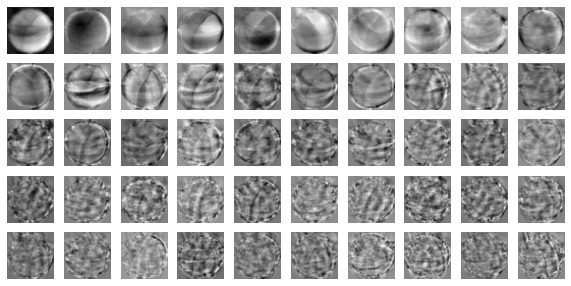

In [7]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [8]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
print(fruits_2d.shape) # 원본 크기
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


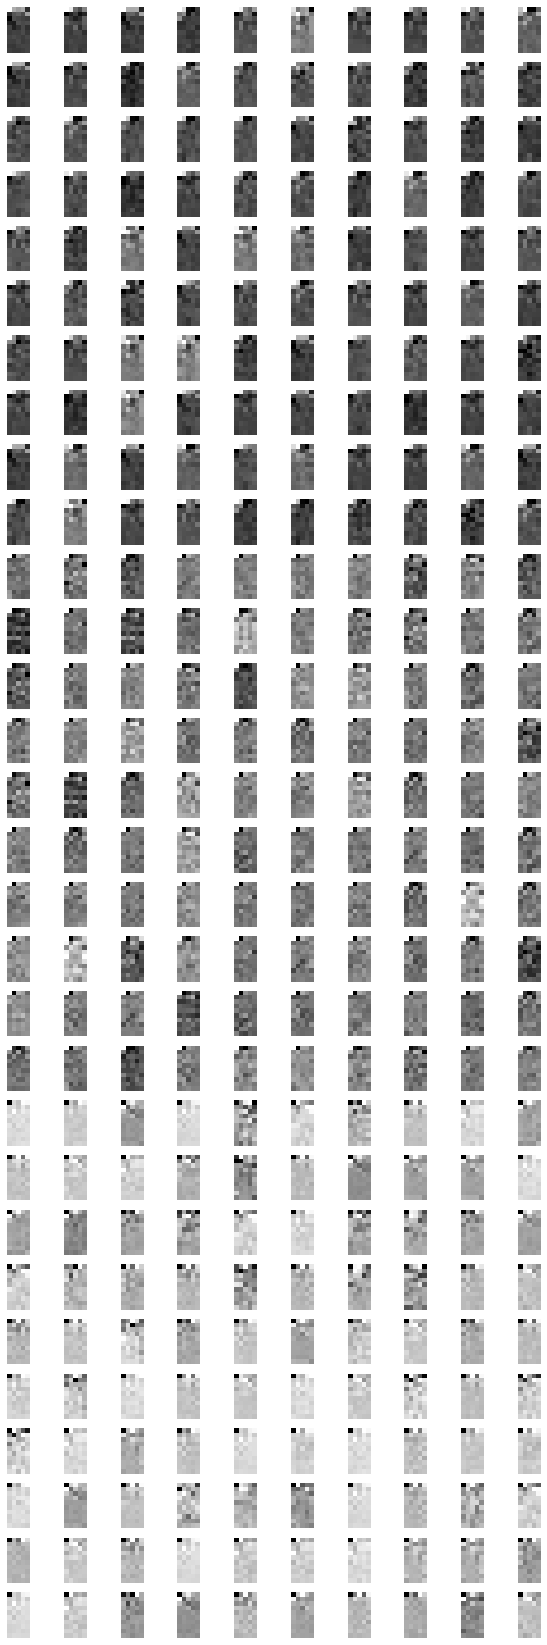

In [9]:
draw_fruits(fruits_pca.reshape(-1,10,5))

---
# 원본 데이터 재구성

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [11]:
# 그림을 그리기위해 2차원 확장
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
fruits_reconstruct.shape

(300, 100, 100)

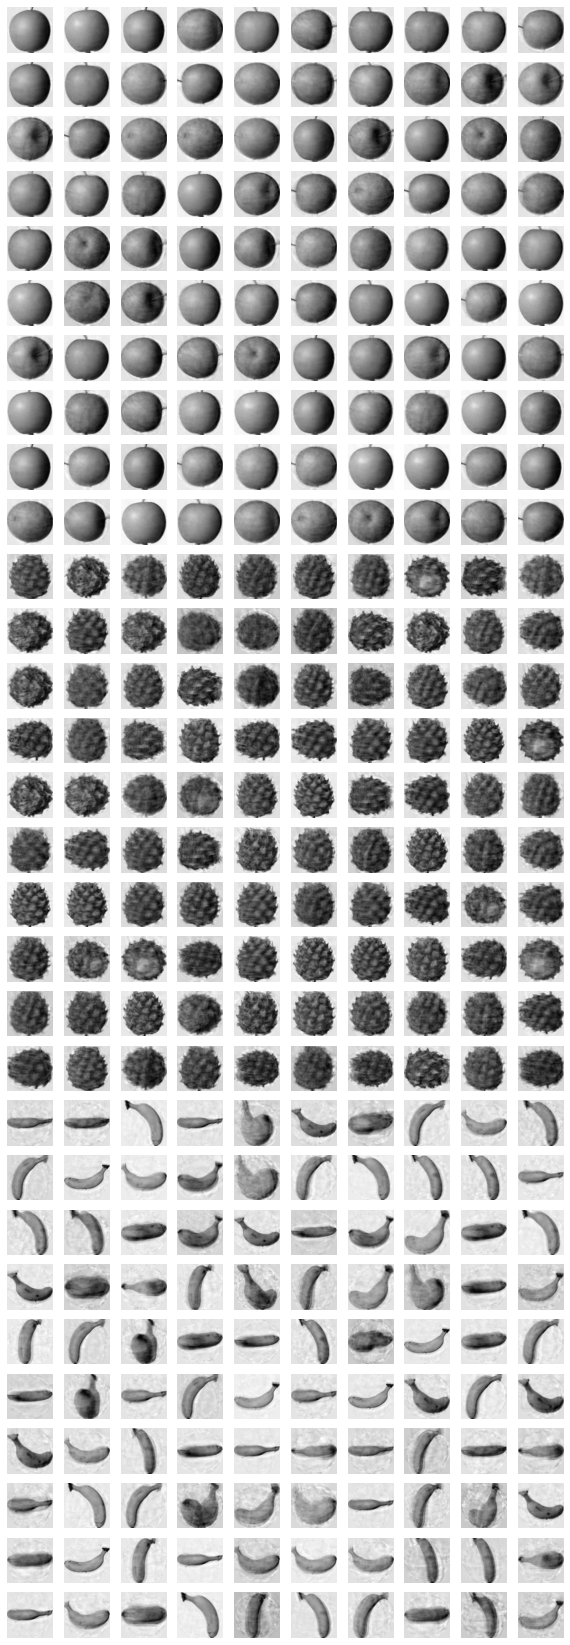

In [12]:
draw_fruits(fruits_reconstruct)

> 1/200의 데이터 특성만 가지고도 전박적으로 배경이 깨끗하지않으나 물체의 구분은 가능하다.

---
# 설명된 분산
: 주성분으로 구성할때 원본 데이터의 분산을 어느정도 유지하고 있었는지 확인하는 방법


In [13]:
np.sum(pca.explained_variance_ratio_)
# 50개의 주성분 데이터

0.9223439872472688

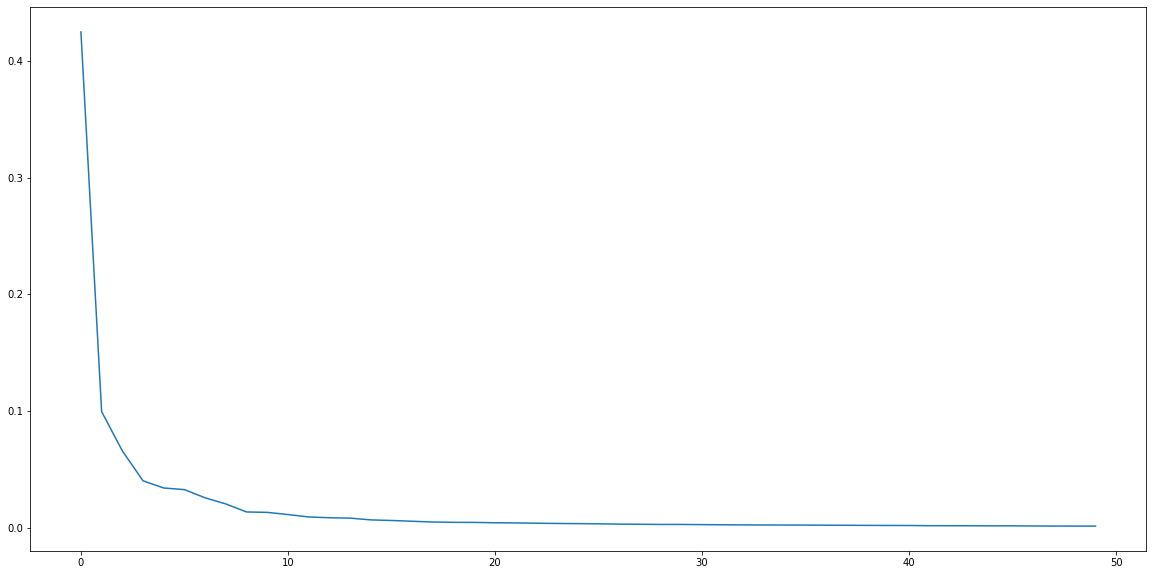

In [14]:
# 그래프 그리기
plt.figure(figsize=(20,10))
plt.plot(pca.explained_variance_ratio_)
plt.show()

> 10개 정도만 주성분을 잡아도 문제 없을 것 같아 보인다.

---
# 주성분을 10개만 정의해서 해보자

In [15]:
pca10 = PCA(n_components=10)
pca10.fit(fruits_2d)

PCA(n_components=10)

In [16]:
pca10.components_.shape

(10, 10000)

In [17]:
np.sum(pca10.explained_variance_ratio_)

0.7711096074977316

In [18]:
fruits_pca10 = pca10.transform(fruits_2d)
print(fruits_pca10.shape)
fruits_inverse10 = pca10.inverse_transform(fruits_pca10)
print(fruits_inverse10.shape)

(300, 10)
(300, 10000)


In [19]:
fruits_reconstruct10 = fruits_inverse10.reshape(-1,100,100)
fruits_reconstruct10.shape

(300, 100, 100)

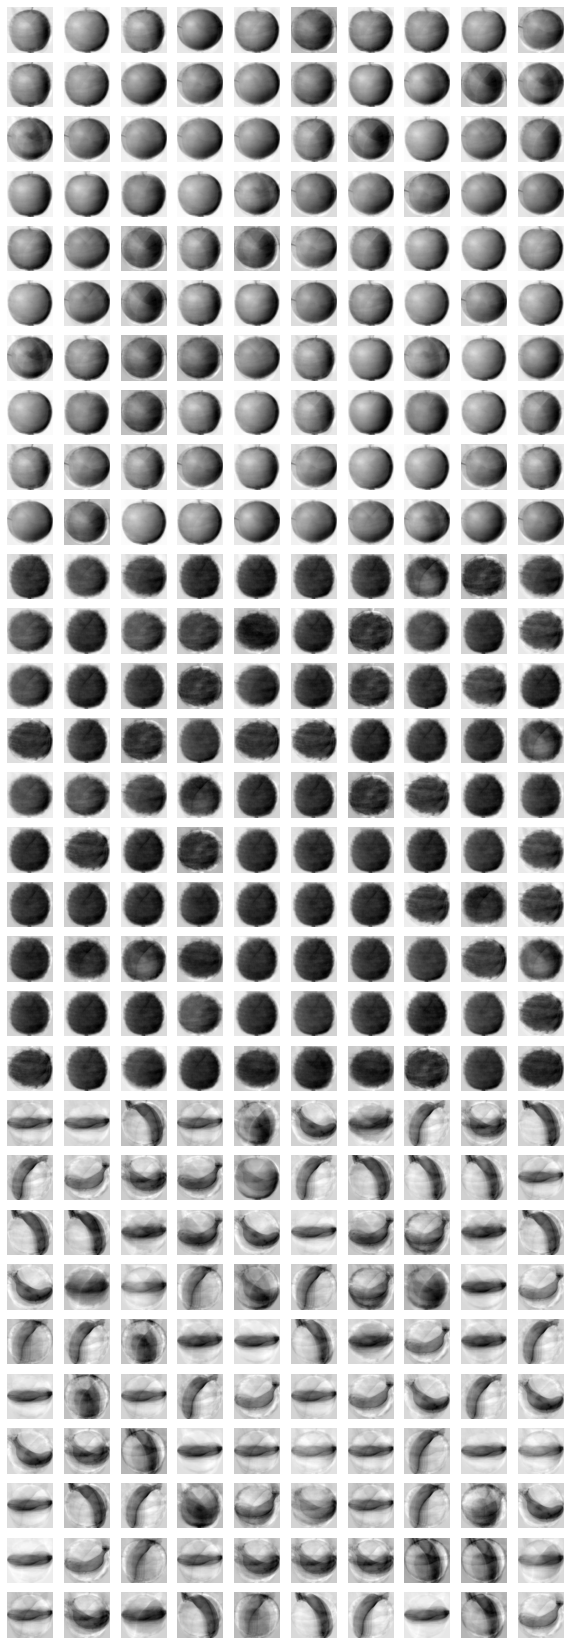

In [20]:
draw_fruits(fruits_reconstruct10)

----
# 로지스틱 회귀부석에 주성분 분석을 대입하여 사용해보기

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [22]:
# 로지스틱 회귀분석은 지도학습이므로 Target이 필요하다
target = np.array([0]*100+[1]*100+[2]*100)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
# 교차검증을 실시
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.3072805881500244


> 정확도는 99.7% 정도이며, 계산에 필요한 시간은 0.3초 정도 나왔다.

In [24]:
# 300 * 50으로 구성된 주성분 분석으로 만든 데이터로 확인
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.018011140823364257


> 정확도는 100% 이며, 계산에 필요한 시간은 0.02초 정도 나왔다.

In [25]:
scores

{'fit_time': array([0.021667  , 0.01383805, 0.01811099, 0.01759481, 0.01884484]),
 'score_time': array([0.00020289, 0.00019312, 0.00016689, 0.00021982, 0.00018501]),
 'test_score': array([1., 1., 1., 1., 1.])}

---
# 주성분 분석의 분산의 크기를 정해 사용하기

In [26]:
pca = PCA(n_components=0.5) # n_components를 실수로 입력하면 분산의 percentage 정도로 나타낸다.
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [27]:
print(pca.n_components_)

2


> 필요한 주성분 Feature를 2개로 사용    
> 주성분 2개면 그래프로 표현이 가능하다.

In [28]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [29]:
# 교차 검증으로 확인
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.018195152282714844


> 정확도는 99.3% 이며 계산시간은 0.02초 정도이다.

In [30]:
# 주성분의 값을 알아보자
pcaComponents = pca.fit_transform(fruits_2d)

# 데이터 프레임 구성
import pandas as pd
pcaDF = pd.DataFrame(data=pcaComponents, columns=['PCA1','PCA2'])
pcaDF.head()

,PCA1,PCA2
0,-2776.498471,-1580.322486
1,-3075.909684,-2734.476728
2,-2616.828977,-1496.477291
3,-3113.625578,-2527.080543
4,-2519.267133,-2323.854018


---
# k-Means에 주성분 분석 적용해보기

In [31]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [32]:
# 군집 갯수와 빈도수 확인하기
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

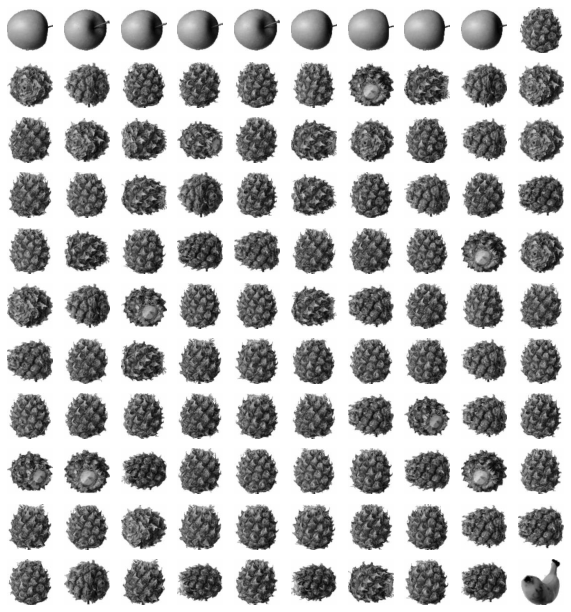

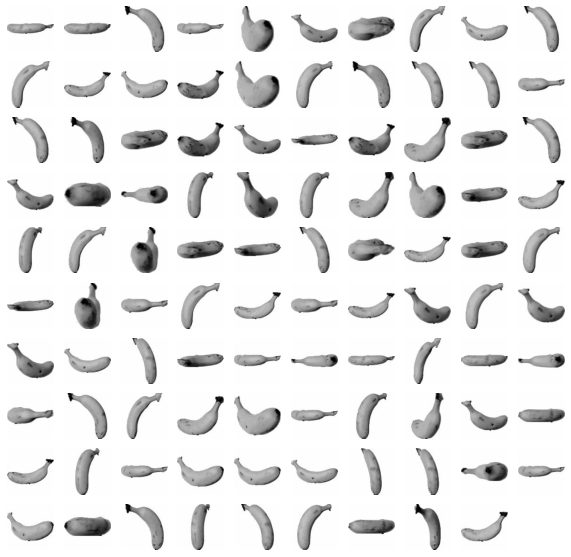

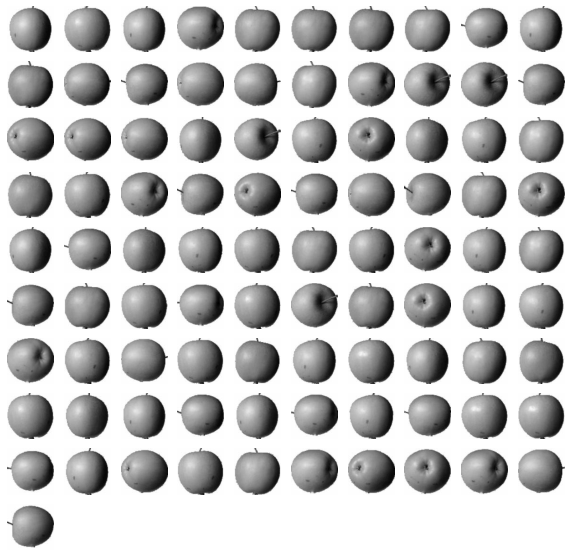

In [33]:
# 그림으로 확인하기
for label in range(0,3):
    draw_fruits(fruits[km.labels_== label])
    print("\n")

---
# 산포도로 확인해보기

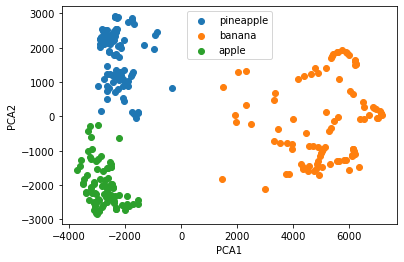

In [34]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0],data[:,1])
plt.legend(['pineapple','banana','apple'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()